# Stack Academy - Data Science do Zero

# Módulo 09 - Machine Learning

## Árvore de Decisão

# 9.72 - Árvores de Decisão - Criando a sua Primeira Árvore e Entendendo os Parametros Iniciais

#### Importação das bibliotecas necessárias

In [136]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Carregando a base de dados iris

In [137]:
iris = load_iris()

#### Verificando a descrição do dataset

In [138]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### Verificando features names, target e dados

In [139]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [140]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [141]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Dividindo os dados em treino e teste

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

#### Verificando a forma dos dados

In [144]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [145]:
y_train.shape,y_test.shape

((105,), (45,))

#### Instânciando o objeto classificador

In [146]:
clf = tree.DecisionTreeClassifier()

#### Parâmetros do  classificador DecisionTreeClassifier
* criterion: medida de qualidade da divisão
* splitter: estratégia utilizada para dividir o nó de decisão
* max_depth: profundidade máxima da árvore
* min_samples_split: número de amostras mínimas para considerar um nó para divisão
* min_samples_leaf: número de amostras mínimas no nível folha

#### Treinando o modelo de arvore de decisão

In [147]:
clf = clf.fit(X_train,y_train)

#### Verificando as features mais importantes para o modelo de arvore de decisão treinado

In [148]:
clf.feature_importances_

array([0.        , 0.01917808, 0.06967621, 0.9111457 ])

In [149]:
for feature,importancia in zip(iris.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

sepal length (cm):0.0
sepal width (cm):0.019178082191780823
petal length (cm):0.06967621419676215
petal width (cm):0.9111457036114571


#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [150]:
resultado = clf.predict(X_test)
resultado

array([0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       0])

#### Testando com uma nova amostra

In [151]:
test = np.array([[5.1,3.5,1.4,0.2]])
clf.predict(test)

array([0])

#### Verificando a probabilidade

In [152]:
clf.predict_proba(test)

array([[1., 0., 0.]])

#### Métricas de Validação

In [153]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



# 9.73 - Árvores de Decisão - Visualizando as Árvores de Forma Gráfica e Controlando o Crescimento Dinâmicamente

#### Biblioteca para utilização de widgets interativos

In [ ]:
!pip install ipywidgets

#### Bibliotecas para visualização da arvore de recisão

In [155]:
!pip3 install pydot

In [156]:
!pip3 install graphviz

#### Importando as bibliotecas instaladas

In [157]:
import pydot
import graphviz 
from ipywidgets import interactive

#### Visualizando de forma gráfica a arvore gerada

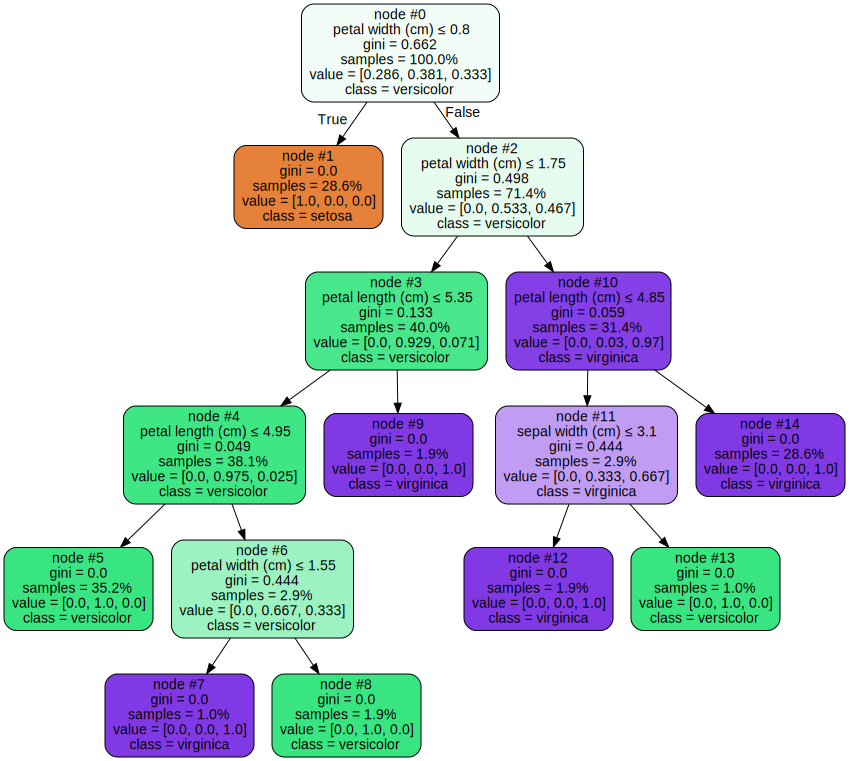

In [158]:
dot_data = tree.export_graphviz(
         clf, 
         out_file=None,
         feature_names=iris.feature_names,
         class_names=iris.target_names,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Bibliotecas necessárias para renderização da arvore de forma interativa

In [159]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source  

#### Renderizando a arvore de forma interativa através da manipulação de parametros

In [160]:
# load dataset
data = load_iris()

# feature matrix
X = data.data

# target vector
y = data.target

# feature labels
features_label = data.feature_names

# class label
class_label = data.target_names


def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = tree.DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_split
          ,min_samples_leaf=min_leaf
    )

    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# 9.74 - Árvores de Decisão - Mergulhando na Estrutura da Árvore e Entendendo seus Objetos

#### Navegando na estrutura de uma arvore de decisão

In [79]:
# Carregando os dados
iris = load_iris()
X = iris.data
y = iris.target

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Por padrão o train_test_split estabelece 25% para teste

In [80]:
# Instanciando o classificador
estimator = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

# Treinando o modelo
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [81]:
# Atributos da Árvore Criada
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

In [82]:
print("Número de nós: {}".format(n_nodes))
print("Indices a esquerda: {}".format(children_left))
print("Indices a direita: {}".format(children_right))
print("Feature: {}".format(feature))
print("Limite (threshold: {}".format(threshold))

Número de nós: 5
Indices a esquerda: [ 1 -1  3 -1 -1]
Indices a direita: [ 2 -1  4 -1 -1]
Feature: [ 3 -2  2 -2 -2]
Limite (threshold: [ 0.80000001 -2.          4.95000005 -2.         -2.        ]


In [83]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 iris.feature_names[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 5 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo petal width (cm) <= 0.800000011920929 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó teste): vai para o nó 3 se o valor do atributo petal length (cm) <= 4.950000047683716 
 se não, vai para o nó 4.
		nó=3 (nó folha).
		nó=4 (nó folha).


#### Extraindo regras da arvore gerada a partir de uma determinada amostra do conjunto de teste X_teste

In [84]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X_test)

    leave_id = estimator.apply(X_test)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nRegras usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(iris.feature_names,X_test[sample_id]):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 iris.feature_names[node_id],
                 X_test[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
    pred =estimator.predict(X_test[sample_id].reshape(1, -1)) 
    print("\tClasse => %s" %iris.target_names[pred])

In [85]:
extrai_regras(2)


Regras usadas para predizer a amostra 2
sepal length (cm) = 5.5
sepal width (cm) = 4.2
petal length (cm) = 1.4
petal width (cm) = 0.2


id do nó de decisão 0 : (atributo sepal length (cm) com valor = 0.2 <= 0.800000011920929)
	Classe => ['setosa']


# 9.75 - Árvores de Decisão - Visualizando as Fronteiras de Complexidade das Árvores Geradas

#### Instalação da biblioteca mlextend para visualização das fronteiras de complexidade

In [ ]:
!pip install mlxtend

#### Entendendo o parâmetro min-samples-split para criação do modelo de arvore de decisão

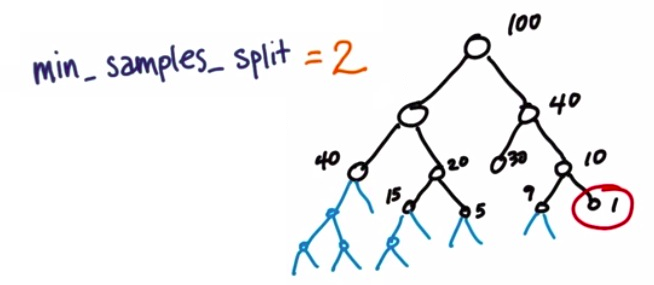

In [137]:
from IPython.display import Image
Image(filename =r"Módulo 09 - Machine Learning\material_apoio\arvore-decisao\imagens\min-samples-split.png", width=500, height=500)

#### Visualizando as fronteiras criadas pela arvore

In [92]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [93]:
def visualize_fronteiras(msamples_split):
    X = iris.data[:, [0, 2]]
    y = iris.target

    clf = tree.DecisionTreeClassifier(min_samples_split=msamples_split)
    tree = clf.fit(X, y)

    plt.figure(figsize=(8,5))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title('Decision Tree on Iris')
    plt.show()

In [ ]:
visualize_fronteiras(2)

In [ ]:
visualize_fronteiras(10)

# 9.76 - Árvores de Decisão - Comparando Modelos e Controlando o Overfitting

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

#### Carregando a base de dados bank-numeric

In [143]:
bank = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\arvore-decisao\datasets\bank-numeric.csv')
bank.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,recent_pdays,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,0.0001,1,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,0.0001,1,...,0,1,0,0,0,1,0,0,0,1


In [144]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  int64  
 1   balance              11162 non-null  int64  
 2   duration             11162 non-null  int64  
 3   campaign             11162 non-null  int64  
 4   previous             11162 non-null  int64  
 5   default_cat          11162 non-null  int64  
 6   housing_cat          11162 non-null  int64  
 7   loan_cat             11162 non-null  int64  
 8   recent_pdays         11162 non-null  float64
 9   deposit_cat          11162 non-null  int64  
 10  job_blue-collar      11162 non-null  int64  
 11  job_entrepreneur     11162 non-null  int64  
 12  job_other            11162 non-null  int64  
 13  job_pink-collar      11162 non-null  int64  
 14  job_self-employed    11162 non-null  int64  
 15  job_technician       11162 non-null 

#### Separando as features das classes

In [145]:
# Dados para teste
bank_data = bank.drop('deposit_cat', 1)

# Variavel Target - Classe
bank_target = bank.deposit_cat

#### Dividindo os dados em treino e teste

In [146]:
X_train, X_test, y_train, y_test = train_test_split(bank_data,bank_target,test_size=0.3)

#### Função para treinar o modelo de arvore de decisão com o parametro max_depth

- maxdepth: Controla a complexidade da árvore.

- Controla a profundidade do modelo. Árvores maiores tem modelos extremamente complexos.

In [147]:
def compara_modelos(maxdepth):
    if maxdepth == 0:
        dt = tree.DecisionTreeClassifier(random_state=1)
    else:   
        dt = tree.DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    dt.fit(X_train, y_train)
    train_score = dt.score(X_train, y_train) # acuracia com dados de treino
    test_score = dt.score(X_test, y_test) # acuracia com dados de teste - ver overfitting
    return train_score,test_score

compara_modelos(2)

# Uma discrepância muito grande entre score usando y_train e y_test indica overfitting

(0.726353513375144, 0.7324574499850701)

In [148]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos(2))))
print('{:1}         {} '.format(3,str(compara_modelos(3))))
print('{:1}         {} '.format(4,str(compara_modelos(4))))
print('{:1}         {} '.format(10,str(compara_modelos(10))))
print('{:1}         {} '.format(15,str(compara_modelos(15))))
print('{:1}         {} '.format('Full',str(compara_modelos(0))))

# maxdepth = a partir de 10: Já houve overfitting. Diferença alta entre os dados

# maxdepth=0: Significa que vou treinar minha árvore de decisão de forma indefinida.
# Até que os níveis folha se tornem puros. Não está fazendo nenhuma poda na árvore.
# O modelo decorou os dados de treino.

# É importante controlar o crescimento da árvore.

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.726353513375144, 0.7324574499850701) 
3         (0.7566875719953923, 0.7670946551209317) 
4         (0.7844617944451555, 0.7939683487608241) 
10         (0.8629207730705235, 0.795759928336817) 
15         (0.9395878663765519, 0.7515676321289937) 
Full         (1.0, 0.7240967452971037) 


# 9.77 - Árvores de Decisão - Verificando a Importância de Features

#### Verificando as features mais importantes para o modelo de arvore de decisão treinado

##### Treinando o modelo utilizando o valor de max_depth igual a 4

In [149]:
dt = tree.DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

##### Listando as features e sua importância para o modelo

In [ ]:
features = dt.feature_importances_

l = len(bank.columns)
for i in range(0,len(bank.columns)-1):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

## Random Forest (Floresta Aleatória)

# 9.80 - Carregando e Transformando o Dataset

#### Importação das bibliotecas necessárias

In [100]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [101]:
df_edu = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\random-forest\xAPI-Edu-Data.csv')

In [102]:
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [103]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

#### Verificando as distribuições de classes.

In [104]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [105]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

- A biblioteca sklearn suporta apenas atributos numéricos.
- Apesar dos algoritmos Arv.Decisao e Random Forest suportarem atributos categóricos, é necessário fazer a conversão para numéricos por usar a biblioteca sklearn.

In [106]:
Features = df_edu
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [107]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


# 9.81 - Random Forest - Criando o Modelo e Entendendo os seus Parametros

#### Dividindo os dados em treino e teste

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a forma dos dados

In [110]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [111]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [112]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta. <br>Por padrão são 10 árvores.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores. <br>Por padrão bootstrap = True.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [113]:
random_clf.fit(X_train,y_train)

RandomForestClassifier()

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [114]:
resultado = random_clf.predict(X_test)

In [115]:
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [116]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        39
           1       0.80      0.97      0.88        34
           2       0.81      0.76      0.78        71

    accuracy                           0.79       144
   macro avg       0.79      0.81      0.79       144
weighted avg       0.79      0.79      0.79       144



# 9.82 - Random Forest - Selecionando Features Importantes para o Modelo

#### Verificando as features mais importantes para o modelo treinado

In [117]:
random_clf.feature_importances_

array([0.02328772, 0.03739745, 0.03640072, 0.01582486, 0.03303756,
       0.02018086, 0.04653347, 0.00931274, 0.05317625, 0.14903113,
       0.16707952, 0.1259034 , 0.08721993, 0.03737524, 0.02296933,
       0.13526983])

In [118]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

VisITedResources            0.167080
raisedhands                 0.149031
StudentAbsenceDays          0.135270
AnnouncementsView           0.125903
Discussion                  0.087220
Relation                    0.053176
Topic                       0.046533
NationalITy                 0.037397
ParentAnsweringSurvey       0.037375
PlaceofBirth                0.036401
GradeID                     0.033038
gender                      0.023288
ParentschoolSatisfaction    0.022969
SectionID                   0.020181
StageID                     0.015825
Semester                    0.009313
dtype: float64

#### Features mais importantes de forma gráfica

In [119]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

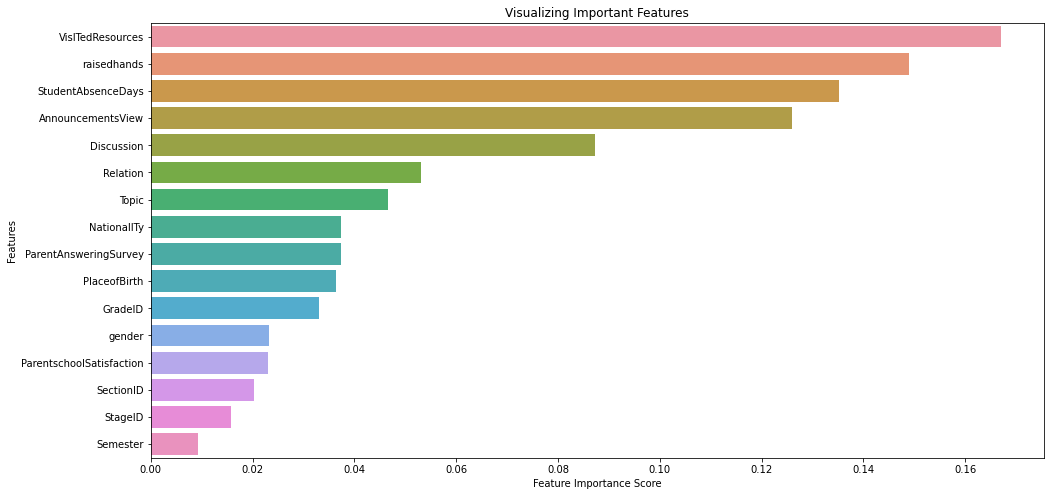

In [120]:
visualiza_features_importantes(feature_imp)

#### Selecionando apenas as features com importancia acima de um determinado score.

In [121]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.1670795202065074
raisedhands:	0.14903112639651742
StudentAbsenceDays:	0.13526983121847794
AnnouncementsView:	0.12590339648692644
Discussion:	0.08721992623088733
Relation:	0.05317625010921519
Topic:	0.04653346702996184
NationalITy:	0.03739744906865611
ParentAnsweringSurvey:	0.03737523635739874
PlaceofBirth:	0.03640072159013947
GradeID:	0.03303755876271626


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

#### Verificando a nova forma dos dados

In [123]:
X_train.shape,X_test.shape

((336, 11), (144, 11))

In [124]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [125]:
random_clf = RandomForestClassifier(random_state=0)

#### Treinando novamente o modelo Random Forest

In [126]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [127]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [128]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        39
           1       0.82      0.94      0.88        34
           2       0.79      0.75      0.77        71

    accuracy                           0.78       144
   macro avg       0.77      0.79      0.78       144
weighted avg       0.78      0.78      0.78       144



# 9.83 - Random Forest - Explorando em Detalhes as Árvores Geradas na Floresta

## Explorando as árvores da Floresta gerada

In [129]:
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_)))
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))

# estimators_: São cada uma sdas árvores geradas.

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 143
Profundidade da árvore: 13
Features importantes: [0.14830124 0.064731   0.24943917 0.04995521 0.08873399 0.15557269
 0.02738309 0.0463594  0.07026499 0.09073365 0.00852556]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

Numero de nós: 173
Profundidade da árvore: 14
Features importantes: [0.2607528  0.20878557 0.08866011 0.09305912 0.0688587  0.03369051
 0.04749137 0.03860463 0.04386521 0.07363634 0.04259565]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=398764591)

Numero de nós: 137
Profundidade da árvore: 13
Features importantes: [0.13207332 0.27302857 0.12176095 0.14278586 0.07549872 0.06107871
 0.05661873 0.07338237 0.00883473 0.01832953 0.0366085 ]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=924231285)

Numero de nós: 155
Profundidade da árvore: 11
Features importantes: [0.04163977 0.12732333 0.12370299 0.11045457 0.23575058 0.109

#### Selecionando uma árvore da floresta

In [130]:
tree0 = random_clf.estimators_[0]
tree0

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

#### Visualizando de forma gráfica

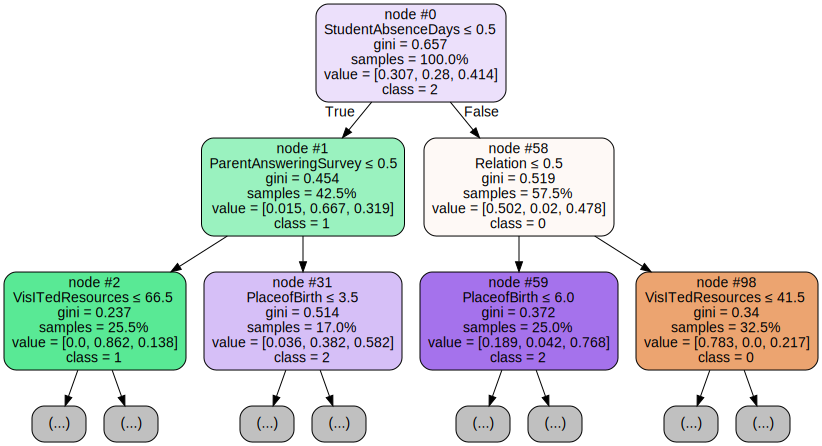

In [131]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Selecionando outra árvore da floresta

In [132]:
tree1 = random_clf.estimators_[1]
tree1

DecisionTreeClassifier(max_features='sqrt', random_state=398764591)

#### Visualizando de forma gráfica

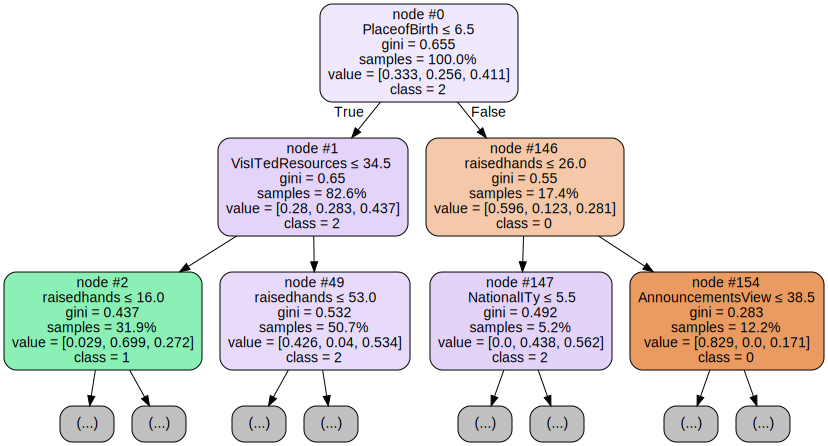

In [133]:
dot_data = export_graphviz(
         tree1,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

# 9.84 - Random Forest - Comparativo de Performance entre o Random Forest vs Árvore de Decisão

#### Importação das bibliotecas necessárias

In [185]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [186]:
df_edu = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\random-forest\xAPI-Edu-Data.csv')

In [187]:
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Verificando as distribuições de classes.

In [188]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [189]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

In [190]:
Features = df_edu
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [191]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### Separando os dados e classes

In [192]:
dataset = df_edu.drop('Class',axis=1)

In [193]:
classes = df_edu['Class']

# Random Forest vs Árvore de Decisão

#### Resultados Random Forest

In [194]:
# Instanciando o objeto classificador RandomForest
random_clf = RandomForestClassifier(random_state=1,n_estimators=100)

In [195]:
resultados_random = model_selection.cross_val_predict(random_clf, dataset, classes, cv=5)

In [196]:
print(classification_report(classes,resultados_random))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       142
           1       0.77      0.78      0.77       127
           2       0.63      0.63      0.63       211

    accuracy                           0.67       480
   macro avg       0.68      0.68      0.68       480
weighted avg       0.67      0.67      0.67       480



#### Resultados Decision Tree

In [197]:
# Instanciando o objeto classificador Decision Tree
tree_clf = DecisionTreeClassifier(random_state=1)

In [198]:
resultados_tree = model_selection.cross_val_predict(tree_clf,dataset,classes,cv=5)

In [199]:
print(classification_report(classes,resultados_tree))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55       142
           1       0.74      0.68      0.70       127
           2       0.54      0.49      0.52       211

    accuracy                           0.57       480
   macro avg       0.59      0.59      0.59       480
weighted avg       0.58      0.57      0.58       480



# 9.85 - Random Forest - Comparativo de Overfitting entre o Random Forest e Árvore de Decisão

#### Verificando Overfitting

In [200]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=1)

In [202]:
def compara_modelos_random_forest(maxdepth):
    if maxdepth == 0:
        rf = RandomForestClassifier(n_estimators=100,random_state=1)
    else: 
        rf = RandomForestClassifier(n_estimators=100,random_state=1, max_depth=maxdepth)
    rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    return train_score,test_score

# maxdepth: Determina a profundidade da árvore

# maxdepth=0: Significa que vou treinar minha árvore de decisão de forma indefinida.
# Até que os níveis folha se tornem puros. Não está fazendo nenhuma poda na árvore.
# O modelo decorou os dados de treino.

In [203]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos_random_forest(2))))
print('{:1}         {} '.format(3,str(compara_modelos_random_forest(3))))
print('{:1}         {} '.format(4,str(compara_modelos_random_forest(4))))
print('{:1}         {} '.format(10,str(compara_modelos_random_forest(10))))
print('{:1}         {} '.format(15,str(compara_modelos_random_forest(15))))
print('{:1}         {} '.format('Full',str(compara_modelos_random_forest(0))))

# Sofremos overfitting desde o início do teste, com maxdepth=2

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.75, 0.6180555555555556) 
3         (0.8244047619047619, 0.6805555555555556) 
4         (0.8720238095238095, 0.7152777777777778) 
10         (1.0, 0.7569444444444444) 
15         (1.0, 0.7986111111111112) 
Full         (1.0, 0.7986111111111112) 


In [204]:
def compara_modelos_decision_tree(maxdepth):
    if maxdepth == 0:
        df = DecisionTreeClassifier(random_state=1)
    else: 
        df = DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    df.fit(X_train, y_train)
    train_score = df.score(X_train, y_train)
    test_score = df.score(X_test, y_test)
    return train_score,test_score

In [205]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos_decision_tree(2))))
print('{:1}         {} '.format(3,str(compara_modelos_decision_tree(3))))
print('{:1}         {} '.format(4,str(compara_modelos_decision_tree(4))))
print('{:1}         {} '.format(10,str(compara_modelos_decision_tree(10))))
print('{:1}         {} '.format(15,str(compara_modelos_decision_tree(15))))
print('{:1}         {} '.format('Full',str(compara_modelos_decision_tree(0))))

# Sofremos overfitting com maxdepth=10 em diante.

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.6398809523809523, 0.6805555555555556) 
3         (0.7321428571428571, 0.7013888888888888) 
4         (0.7916666666666666, 0.7430555555555556) 
10         (0.9910714285714286, 0.6875) 
15         (1.0, 0.6944444444444444) 
Full         (1.0, 0.6944444444444444) 


# 9.86 - Random Forest - Fazendo Tunning do Modelo utilizando GridSearch CV

## Tunning do Modelo para Garantir o Melhor Desempenho

#### Como encontrar os melhores valores para os parametros do modelo?

RandomForestClassifier(<br>
**n_estimators=?,**<br>
Número de árvores que irá compor a nossa floresta.<br>
**criterion='gini' ou 'entropy',**<br>
Fará a divisão entre os atributos e separação da melhor forma.<br>
**max_depth=?,**<br>
Controla a profundidade das árvores da floresta.<br>
**in_samples_split=?,**<br>
Amostras mínimas que um determiando nó deve ter para ser considerado um nó de decisão.<br>
**min_samples_leaf=?**<br>
Amostras mínimas para um determinado nível folha.<br>
) ...

#### GridSearchCV para testes de Hyperparametros

In [206]:
from sklearn.model_selection import GridSearchCV

#### Lista de possíveis valores de estimators ou quantidade de árvores da floresta.

In [207]:
valores_estimators = [10, 20, 50, 100, 150]

#### Lista de possíveis valores para o critério de divisão.

In [208]:
valores_criterion = ['gini','entropy']

#### Lista de possíveis valores para a profundidade máxima de cada árvore

In [209]:
valores_max_depth = [10, 20, 50, 100]

#### Lista de possíveis valores para os parametros min_samples_split e min_samples_leaf.

In [210]:
valores_min_samples_split = [2, 5, 10,15]
valores_min_samples_leaf = [1, 5, 10,15]

#### Define um dicionário que recebe as listas de parâmetros e valores.

In [211]:
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )

#### Dicionário com os parametros que serão utilizados no grid.

In [212]:
parametros_grid

{'n_estimators': [10, 20, 50, 100, 150],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 50, 100],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 5, 10, 15]}

#### Instancia o GridSearch com o modelo a ser utilizado, parametros, número de folds e scoring.

In [213]:
rf = RandomForestClassifier()

In [214]:
grid = GridSearchCV(rf, parametros_grid, cv=5, scoring='accuracy')

#### Aplica o GridSearch passando as features e classes

In [215]:
grid.fit(df_edu.drop('Class',axis=1),df_edu['Class'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='accuracy')

#### Imprime os scores por combinações.

In [216]:
grid.cv_results_

{'mean_fit_time': array([0.02748466, 0.03278823, 0.07699275, 0.20872831, 0.26634746,
        0.01735497, 0.03391681, 0.07599039, 0.15125198, 0.22619214,
        0.01814985, 0.03311715, 0.07479353, 0.14801998, 0.21861892,
        0.01717038, 0.03051171, 0.07595892, 0.14293351, 0.21674695,
        0.01634932, 0.03152332, 0.07340331, 0.14728117, 0.21422505,
        0.01733751, 0.03052597, 0.07200141, 0.146206  , 0.21555414,
        0.01656575, 0.0315135 , 0.07501292, 0.14633741, 0.21574426,
        0.01602345, 0.02956395, 0.07160158, 0.14380689, 0.21183658,
        0.01555748, 0.03272595, 0.07130656, 0.13943377, 0.20924439,
        0.01793127, 0.0295289 , 0.07012095, 0.13850217, 0.20685387,
        0.01694703, 0.02973366, 0.06981468, 0.14080887, 0.20905113,
        0.0168077 , 0.03122516, 0.07225008, 0.1406354 , 0.20954232,
        0.01555219, 0.02891397, 0.07918496, 0.15490417, 0.22762518,
        0.01594992, 0.03590937, 0.08342004, 0.15199375, 0.21633482,
        0.0191318 , 0.03290138,

#### Verificando os melhores parâmetros.

In [217]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 20}

#### Verificando o melhor score.

In [218]:
grid.best_score_

0.7270833333333334

## Classes Desbalanceadas

# 9.87 - Lidando com Classes Desbalanceadas

In [ ]:
# caso você não tem essa biblioteca instalada use o comando abaixo.
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

### **Modelo com classes desbalanceadas**

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\classes-desbalanceadas\bank-full.csv', sep=';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Formatando algumas colunas**

In [8]:
df["default"] = df["default"].map({"no":0,"yes":1})
df["housing"] = df["housing"].map({"no":0,"yes":1})
df["loan"] = df["loan"].map({"no":0,"yes":1})
df["y"] = df["y"].map({"no":0,"yes":1})
df.education = df.education.map({"primary": 0, "secondary":1, "tertiary":2})
df.poutcome = df.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
df.contact = df.contact.map({"cellular": 0, "unknown":1, "telephone":2})
df.month = pd.to_datetime(df.month, format = "%b").dt.month

**Checando missing values**

In [9]:
df.isnull().sum()

age             0
job             0
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

**Removendo missing values**

In [10]:
df.dropna(inplace = True)

# inplace: Alteração em memória

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2.0,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,technician,single,1.0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,1,5,5,76,1,-1,0,0,0
5,35,management,married,2.0,0,231,1,0,1,5,5,139,1,-1,0,0,0
6,28,management,single,2.0,0,447,1,1,1,5,5,217,1,-1,0,0,0


**Transformando colunas categóricas em numéricas**

In [12]:
df = pd.get_dummies(df)

In [13]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1


**Visualizando a distribuição das classes**

In [14]:
df.y.value_counts()

# A classe 0 é muito maior que a classe 1. Desbalanceado.

0    38317
1     5037
Name: y, dtype: int64

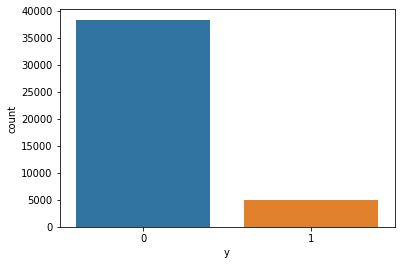

In [15]:
import seaborn as sns
ax = sns.countplot(x="y", data=df)

**Executando um Algoritmo Classificador**

In [16]:
lr = LogisticRegression()

**Separa dados e suas classes**

In [17]:
X = df.drop("y", axis = 1)
y = df.y

**Separa dados de treino e teste**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

# stratify=y: Significa que o algoritmo vai aleatoriezar os dados
# Quando não se passa o tamanho da divisão trieno/teste será por padrão: 70% treino / 30% teste

**Treina o algoritmo**

In [21]:
lr.fit(X_train, y_train)

LogisticRegression()

**Coloca as classificações na variável y_pred**

In [22]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [23]:
accuracy_score(y_test, y_pred)

0.8934403542762247

**Relatório de Classificação**

- *Observe o Recall*

In [24]:
print (classification_report(y_test, y_pred))

# O modelo acertou pouco para classificação da classe 1
# Está enviezado para a classe 0 devido ao desbalanço de classes

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9580
           1       0.61      0.22      0.33      1259

    accuracy                           0.89     10839
   macro avg       0.76      0.60      0.63     10839
weighted avg       0.87      0.89      0.87     10839



**Matriz de confusão**

In [25]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0         9404  176   9580
1          979  280   1259
All      10383  456  10839


### **Aplicando NearMiss:**

*   Método de Undersampling.
*   Iguala as quantidade de amostras entre as classes.

In [26]:
from imblearn.under_sampling import NearMiss

**Instancia o NearMiss**

In [27]:
nr = NearMiss()

**Aplica o NearMiss**

*   Aplica o NearMiss nos dados para igualar a quantidade de amostras das classes

In [29]:
X, y = nr.fit_resample(X, y)

**Checa a quantidade de amostras entre as classes**

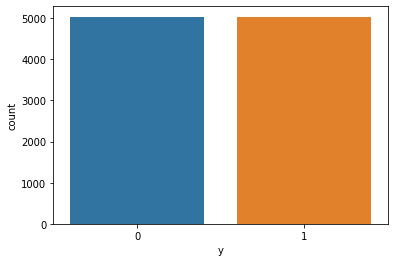

In [30]:
ax = sns.countplot(x=y)

*   Separa em 70% dos dados para treino e 30% para teste.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instância o classificador**

In [32]:
lr = LogisticRegression()

**Treina o algoritmo**

In [33]:
lr.fit(X_train, y_train)

LogisticRegression()

**Coloca as classificações na variável y_pred**

In [34]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [35]:
accuracy_score(y_test, y_pred)

0.8721714966256451

**Recall**

In [36]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1259
           1       0.89      0.85      0.87      1260

    accuracy                           0.87      2519
   macro avg       0.87      0.87      0.87      2519
weighted avg       0.87      0.87      0.87      2519



**Matriz de confusão**

In [37]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1129   130  1259
1         192  1068  1260
All      1321  1198  2519


### **Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)**

*   Gera dados sintéticos da classe minoritária.

**Separa os dados e as classes**

*Aqui vamos repetir esse passo, pois, no teste do NearMiss a gente substituiu os dados das varíaveis X e y*

In [38]:
X = df.drop("y", axis = 1)
y = df.y

**Visualizando a quantidade de dados por classe**

In [39]:
np.bincount(y)

array([38317,  5037], dtype=int64)

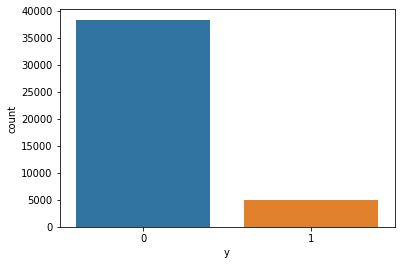

In [40]:
ax = sns.countplot(x=y)

**Instância o SMOTE**

In [41]:
# sampling_strategy=0.5 - Aumenta os exemplos da classe minoritária em 50% da classe majoritária
# Sem setar iguala as classes na mesma quantidade
smt = SMOTE(sampling_strategy=0.5)

**Aplica o SMOTE nos dados**

In [43]:
X, y = smt.fit_resample(X, y)

**Visualizando a distribuição das amostras**

In [44]:
np.bincount(y)

array([38317, 19158], dtype=int64)

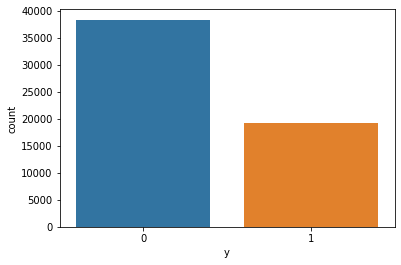

In [45]:
ax = sns.countplot(x=y)

**Separando Treino e Teste**

*   Separa em 70% dos dados para treino e 30% para teste.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instância o classificador**

In [47]:
lr = LogisticRegression()

**Treina o algoritmo**

In [48]:
lr.fit(X_train, y_train)

LogisticRegression()

**Coloca as classificações na variável y_pred**

In [49]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [50]:
accuracy_score(y_test, y_pred)

0.8179414016285058

**Recall**

In [51]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      9579
           1       0.78      0.63      0.70      4790

    accuracy                           0.82     14369
   macro avg       0.81      0.77      0.78     14369
weighted avg       0.81      0.82      0.81     14369



**Matriz de Confusão**

In [52]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0     1    All
Real                       
0         8734   845   9579
1         1771  3019   4790
All      10505  3864  14369
